<a href="https://colab.research.google.com/github/kaifkh20/nn_z_to_h/blob/main/andrej_z_to_h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

class Value:
  def __init__(self,data,_children=(),_op='',label=''):
    self.data = data
    self._prev = set(_children)
    self._backward = lambda : None
    self.grad = 0.0
    self.label = label
    self._op = _op
  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self,other):
    other = other if isinstance(other,Value) else Value(other)
    out = Value(self.data + other.data,(self,other),'+')
    def _backward():
        self.grad += 1.0 * out.grad
        other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __radd__(self,other): #other+Value(value)
    return self  + other

  def __sub__(self,other):
    return self + (-other)

  def __rsub__(self,other):
    return other + (-self)

  def __rmul__(self,other):
    return self*other

  def __mul__(self,other):
    other = other if isinstance(other,Value) else Value(other)
    out = Value(self.data * other.data,(self,other),'*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __truediv__(self,other):
    return self * other**-1


  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
def lol():

  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data


  print((L2 - L1)/h)

lol()

0.0
-3.9999999999995595


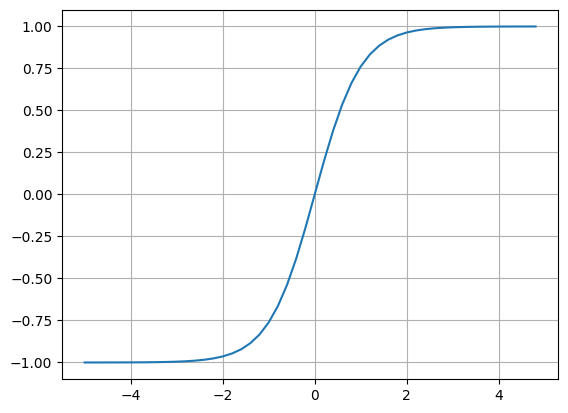

In [ ]:

plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();


In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
o.grad = 1.0
o._backward()

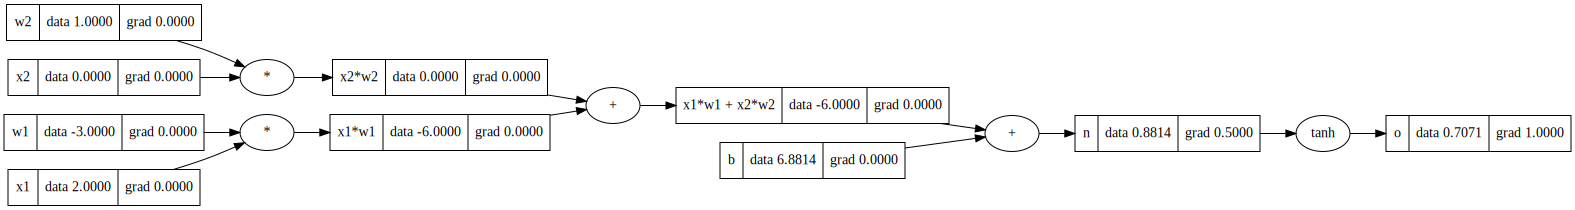

In [ ]:
draw_dot(o)

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#-----same as tanh
e = (2*n).exp()
o = (e-1)/(e+1)
# o = n.tanh(); o.label = 'o'
o.grad = 1.0
o.backward()


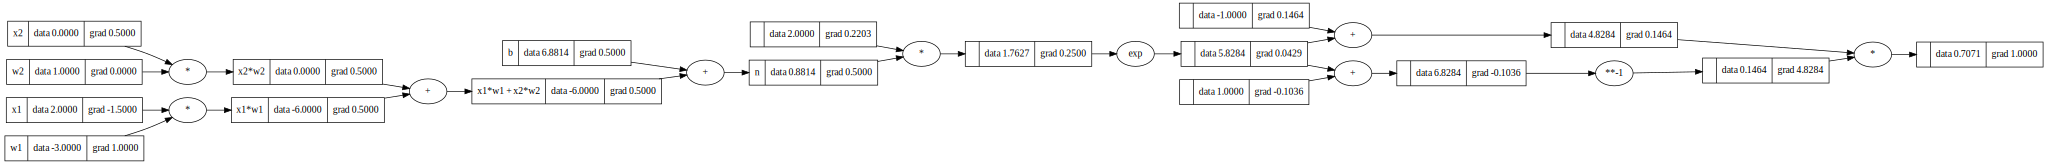

In [ ]:
draw_dot(o)

In [1]:
#Same thing with PyTorch

import torch

In [2]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [20]:
# Building a Neuron

class Neuron:
  def __init__(self,nin): #nin refers to number of inputs a neuron is taking
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] #some random weights
    self.b = Value(random.uniform(-1,1)) #some random bias

  def __call__(self,x):
    act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b) #activation function
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]


In [22]:
class Layer:
  def __init__(self,nin,nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


In [23]:
class MLP:
  def __init__(self,nin,nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]



MLP(top) <-> Layers(middle) <-> Neurons(base)

A Layer have one or more neuron. A MLP have Layers.

MLP -> sz[nin] + nouts
Example : 3(input) + [4,4,1](two hidden layers with 4 neurons) [3,4,4,1]
self.layers = [Layer 3->4],[Layer 4->4], [Layer 4->1]

Parameters function is used to retrieve weight and biase of a neuron becuase it's trainable


In [24]:
x = [2.0,3.0,-1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=-0.09929608348245086)

In [28]:
n.parameters()
len(n.parameters())

41

In [25]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

ypred = [n(x) for x in xs]
ypred

[Value(data=-0.09929608348245086),
 Value(data=-0.7000553718012644),
 Value(data=-0.13267156183997594),
 Value(data=-0.29045334709331894)]

In [26]:
#Squared Loss Function
loss = sum((yout-ygt)**2 for ygt,yout in zip(ys,ypred))
loss

Value(data=3.7159471198105893)

In [29]:
loss.backward()

In [19]:
n.layers[0].neurons[0].w[0].grad

-0.09853654110628035

In [32]:
for k in range(20):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

  print(k, loss.data)

0 0.021925234875830955
1 0.020813406319145397
2 0.01980332843049165
3 0.01888189950795349
4 0.01803815424146432
5 0.017262847579333804
6 0.016548131897460135
7 0.01588730399698867
8 0.01527460496150114
9 0.014705060452083567
10 0.01417435224096555
11 0.013678714096977847
12 0.013214846815319453
13 0.012779848416913424
14 0.012371156456939996
15 0.01198650006675055
16 0.011623859870600328
17 0.011281434312711256
18 0.010957611232805673
19 0.010650943762392609


In [33]:
ypred


[Value(data=0.9575038508536043),
 Value(data=-0.9545044835055001),
 Value(data=-0.9401917984363195),
 Value(data=0.9434477403215684)]